In [1]:
!pip install transformers[torch] -q
!pip install umap-learn numpy matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
import warnings
# To ignore all warnings (not recommended unless you're sure about the consequences)
warnings.filterwarnings("ignore")

In [3]:
import torch
import pandas as pd
import numpy as np
import os
from transformers import AutoTokenizer,AutoModelForMaskedLM
from transformers import pipeline

In [4]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [5]:
model1=AutoModelForMaskedLM.from_pretrained('sampathlonka/San-BERT')
model1

config.json:   0%|          | 0.00/870 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [6]:
model1.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [7]:
tokenizer1=AutoTokenizer.from_pretrained('sampathlonka/San-BERT')
tokenizer1

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/472k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/951k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='sampathlonka/San-BERT', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [8]:
import re

In [9]:
#df.to_csv('cleaned.csv')
data = pd.read_excel('/content/manipulated_data.xlsx')

In [27]:
#df.to_csv('cleaned.csv')
dataviz = pd.read_excel('/content/manipulated_data.xlsx')

In [28]:
dataviz

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,vimochana - releif,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion
0,वागर्थाविवसंपृक्तौवागर्थप्रतिपत्तये।जगतःपितरौव...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,क्वसूर्यप्रभवोवंशःक्वचाल्पविषयामतिः।तितीर्षुर्...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,मन्दःकवियशःप्रार्थीगमिष्याम्यपहास्यताम्।प्रांश...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,अथवाकृतवाग्द्वारेवंशेऽस्मिन्पूर्वसूरिभिः।मणौवज...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,सोऽहमाजन्मशुद्धानामाफलोदयकर्मणाम्।आसमुद्रक्षित...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,मरुताम्पश्यताम्तस्यशिरांसिपतितान्यपि।मनोनातिवि...,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1027,अथमदगुरुपक्षैलोकपालद्विपानामनुगतमलिवृन्दैर्गण्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028,यन्ताहरेःसपदिसंहृतकार्मुकज्यमापृच्छ्यराघवमनुष्...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,रघुपतिरपिजातवेदोविशुद्धाम्प्रगृह्यप्रियाम्प्रि...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
!pip install sns -q

  Preparing metadata (setup.py) ... done


In [33]:
import seaborn as sns

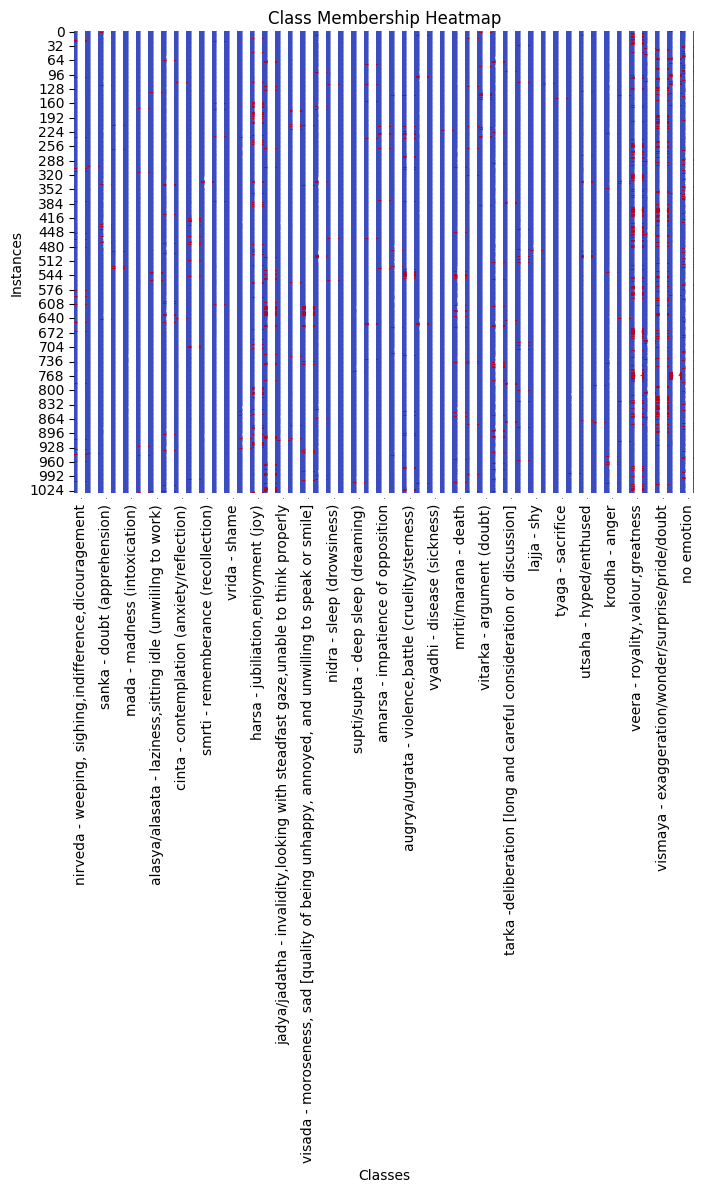

In [37]:
df = pd.DataFrame(dataviz)

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=[int, float]).columns

# Create a heatmap using seaborn with numeric columns only
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns], cmap='coolwarm', annot=True, cbar=False)
plt.title('Class Membership Heatmap')
plt.xlabel('Classes')
plt.ylabel('Instances')
plt.show()

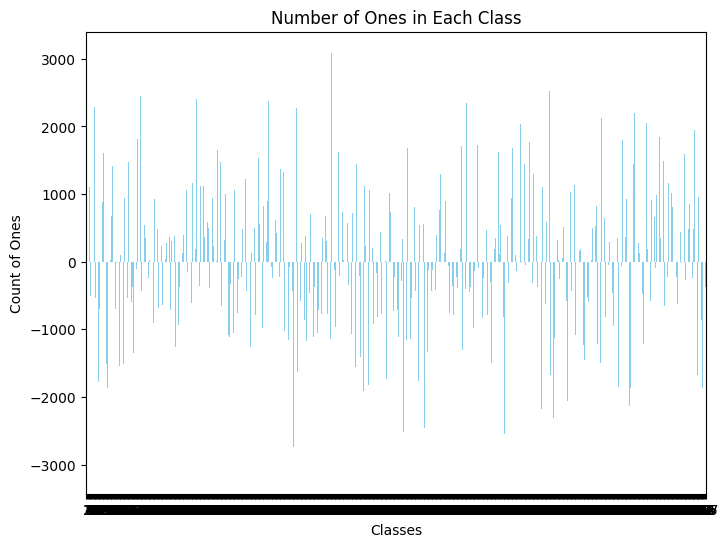

In [35]:
# Calculate the number of ones in each class column
ones_count = df.iloc[:, 1:].sum()

# Create a bar graph
plt.figure(figsize=(8, 6))
ones_count.plot(kind='bar', color='skyblue')
plt.title('Number of Ones in Each Class')
plt.xlabel('Classes')
plt.ylabel('Count of Ones')
plt.xticks(rotation=0)
plt.show()

veera - royality,valour,greatness                                                                268
vismaya - exaggeration/wonder/surprise/pride/doubt                                               208
no emotion                                                                                       140
harsa - jubiliation,enjoyment (joy)                                                              128
avega - intense emotion (agitation/flurry)                                                        99
augrya/ugrata - violence,battle (cruelity/sterness)                                               68
bhakti - devotion                                                                                 57
utsuka - restless/anxious                                                                         49
nirveda - weeping, sighing,indifference,dicouragement                                             47
visada - moroseness, sad [quality of being unhappy, annoyed, and unwilling to speak or smil

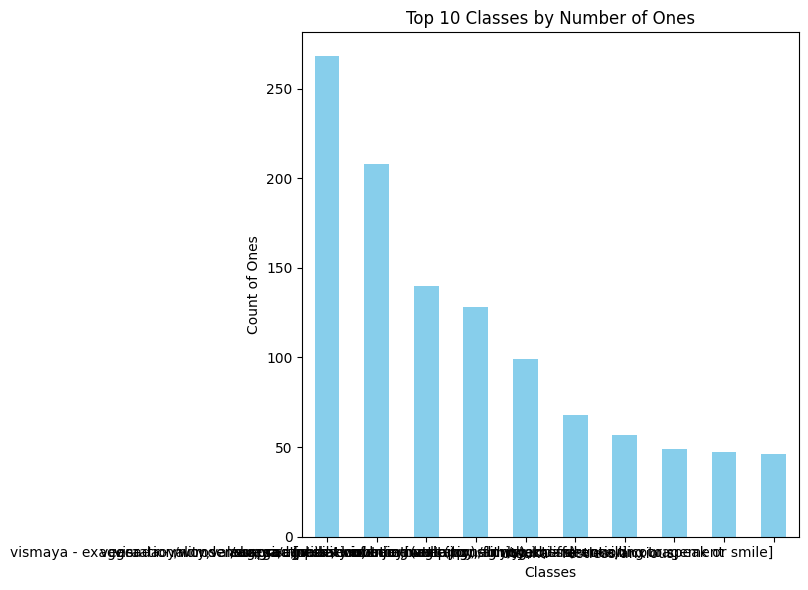

In [39]:
ones_count = df.iloc[:, 1:].sum()

# Sort the classes based on the number of ones
sorted_ones_count = ones_count.sort_values(ascending=False)

# Print only the top 10 classes
top_10_classes = sorted_ones_count.head(10)
print(top_10_classes)

# Create a bar graph for the top 10 classes
plt.figure(figsize=(8, 6))
top_10_classes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Classes by Number of Ones')
plt.xlabel('Classes')
plt.ylabel('Count of Ones')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

veera - royality,valour,greatness                                                                268
vismaya - exaggeration/wonder/surprise/pride/doubt                                               208
no emotion                                                                                       140
harsa - jubiliation,enjoyment (joy)                                                              128
avega - intense emotion (agitation/flurry)                                                        99
augrya/ugrata - violence,battle (cruelity/sterness)                                               68
bhakti - devotion                                                                                 57
utsuka - restless/anxious                                                                         49
nirveda - weeping, sighing,indifference,dicouragement                                             47
visada - moroseness, sad [quality of being unhappy, annoyed, and unwilling to speak or smil

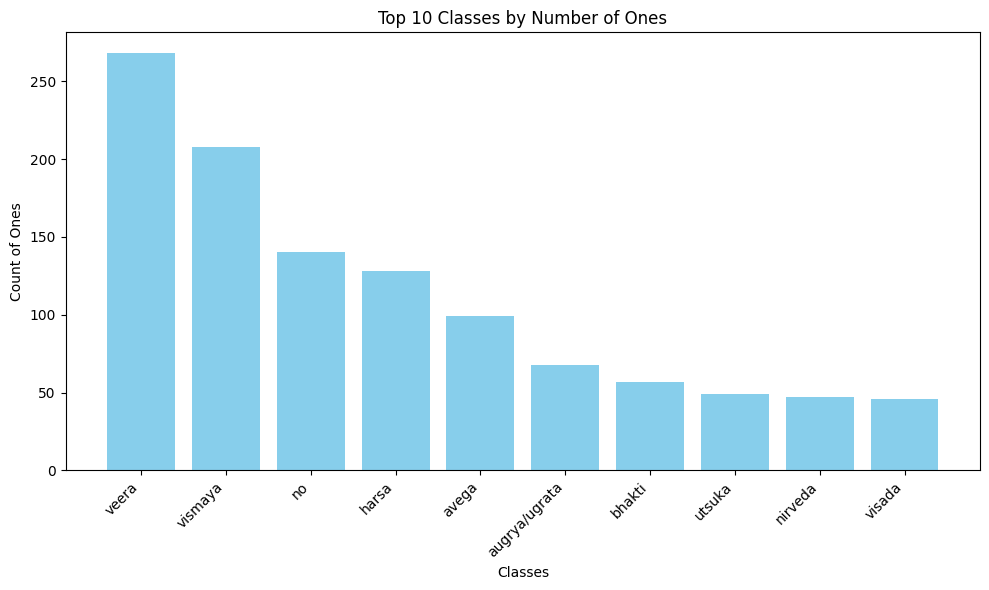

In [45]:
ones_count = df.iloc[:, 1:].sum()

# Sort the classes based on the number of ones
sorted_ones_count = ones_count.sort_values(ascending=False)

# Extract the first word from each class name
shortened_class_names = [name.split()[0] for name in sorted_ones_count.index]

# Print only the top 10 classes
top_10_classes = sorted_ones_count.head(10)
print(top_10_classes)

# Create a bar graph for the top 10 classes
plt.figure(figsize=(10, 6))
plt.bar(shortened_class_names[:10], top_10_classes[:10], color='skyblue')
plt.title('Top 10 Classes by Number of Ones')
plt.xlabel('Classes')
plt.ylabel('Count of Ones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

veera - royality,valour,greatness                                                                268
vismaya - exaggeration/wonder/surprise/pride/doubt                                               208
no emotion                                                                                       140
harsa - jubiliation,enjoyment (joy)                                                              128
avega - intense emotion (agitation/flurry)                                                        99
augrya/ugrata - violence,battle (cruelity/sterness)                                               68
bhakti - devotion                                                                                 57
utsuka - restless/anxious                                                                         49
nirveda - weeping, sighing,indifference,dicouragement                                             47
visada - moroseness, sad [quality of being unhappy, annoyed, and unwilling to speak or smil

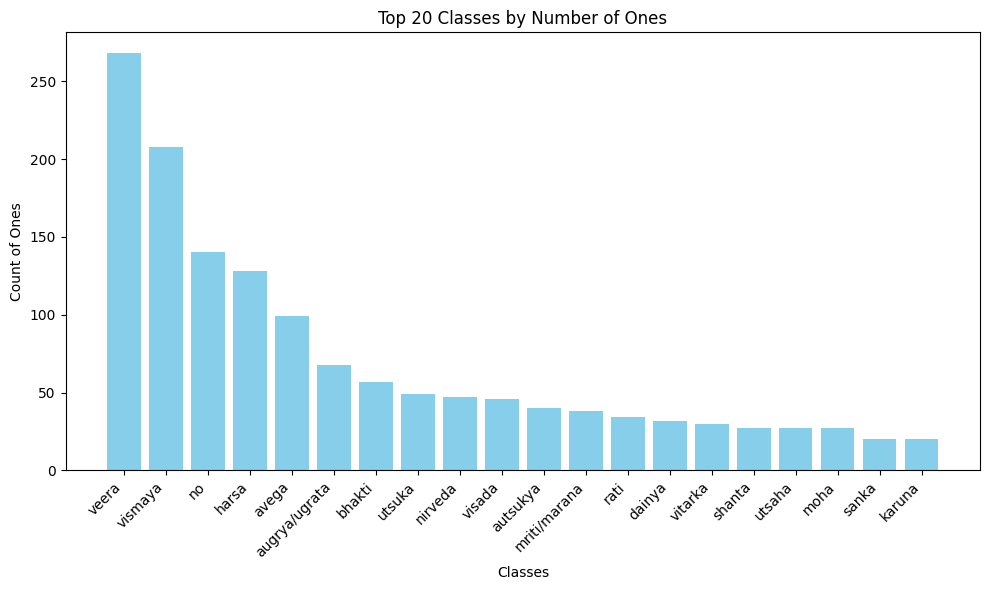

In [46]:
ones_count = df.iloc[:, 1:].sum()

# Sort the classes based on the number of ones
sorted_ones_count = ones_count.sort_values(ascending=False)

# Extract the first word from each class name
shortened_class_names = [name.split()[0] for name in sorted_ones_count.index]

# Print only the top 10 classes
top_20_classes = sorted_ones_count.head(20)
print(top_20_classes)

# Create a bar graph for the top 10 classes
plt.figure(figsize=(10, 6))
plt.bar(shortened_class_names[:20], top_20_classes[:20], color='skyblue')
plt.title('Top 20 Classes by Number of Ones')
plt.xlabel('Classes')
plt.ylabel('Count of Ones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
embedding=[]

In [11]:
df=data

In [12]:
for i in range(len(df)):
    with torch.no_grad():
        t = tokenizer1.encode(df.Text[i][0],max_length=512, padding=True, truncation=True, return_tensors="pt")
        model_output = model1.bert(t).last_hidden_state
        model_output = model_output.squeeze()
        out = torch.mean(model_output,dim=0)
        out_numpy = out.numpy()
        embedding.append(out_numpy)

In [13]:
embedding[500].shape

(768,)

In [14]:
data= np.array(embedding)
data

array([[-0.96271306, -1.3908592 , -0.5929441 , ...,  0.02827228,
        -0.8196438 , -0.35851505],
       [-0.9627138 , -1.3908588 , -0.59294325, ...,  0.02827181,
        -0.8196443 , -0.35851502],
       [-0.96271414, -1.39086   , -0.5929442 , ...,  0.02827181,
        -0.8196443 , -0.3585155 ],
       ...,
       [-0.962714  , -1.3908595 , -0.59294385, ...,  0.02827162,
        -0.81964403, -0.35851547],
       [-0.96271354, -1.3908578 , -0.5929436 , ...,  0.02827252,
        -0.819644  , -0.3585156 ],
       [-0.96271396, -1.390859  , -0.5929436 , ...,  0.02827217,
        -0.81964403, -0.3585154 ]], dtype=float32)

In [15]:
data.shape

(1031, 768)

## t-SNE Visualization

In [16]:
data

array([[-0.96271306, -1.3908592 , -0.5929441 , ...,  0.02827228,
        -0.8196438 , -0.35851505],
       [-0.9627138 , -1.3908588 , -0.59294325, ...,  0.02827181,
        -0.8196443 , -0.35851502],
       [-0.96271414, -1.39086   , -0.5929442 , ...,  0.02827181,
        -0.8196443 , -0.3585155 ],
       ...,
       [-0.962714  , -1.3908595 , -0.59294385, ...,  0.02827162,
        -0.81964403, -0.35851547],
       [-0.96271354, -1.3908578 , -0.5929436 , ...,  0.02827252,
        -0.819644  , -0.3585156 ],
       [-0.96271396, -1.390859  , -0.5929436 , ...,  0.02827217,
        -0.81964403, -0.3585154 ]], dtype=float32)

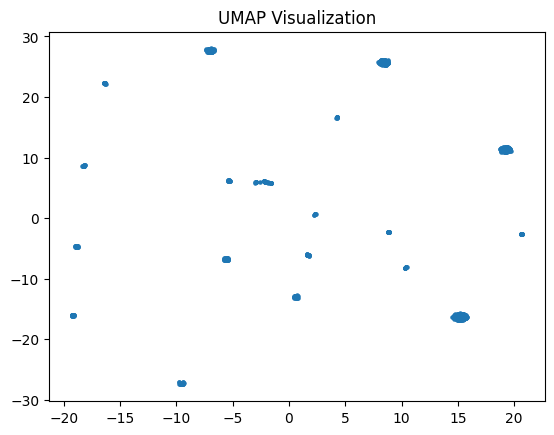

In [17]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the embeddings list to a numpy array
embeddings_np = np.array(embedding)

# Perform dimensionality reduction using UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
embeddings_umap = reducer.fit_transform(embeddings_np)

# Visualize the UMAP embeddings
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=5)
plt.title('UMAP Visualization')
plt.show()

# Perform clustering using K-means
n_clusters = 5  # You can choose the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap)

# Add the cluster labels to your dataframe
df['cluster'] = clusters

# Now df contains the cluster labels for each data point
#print(df.head())

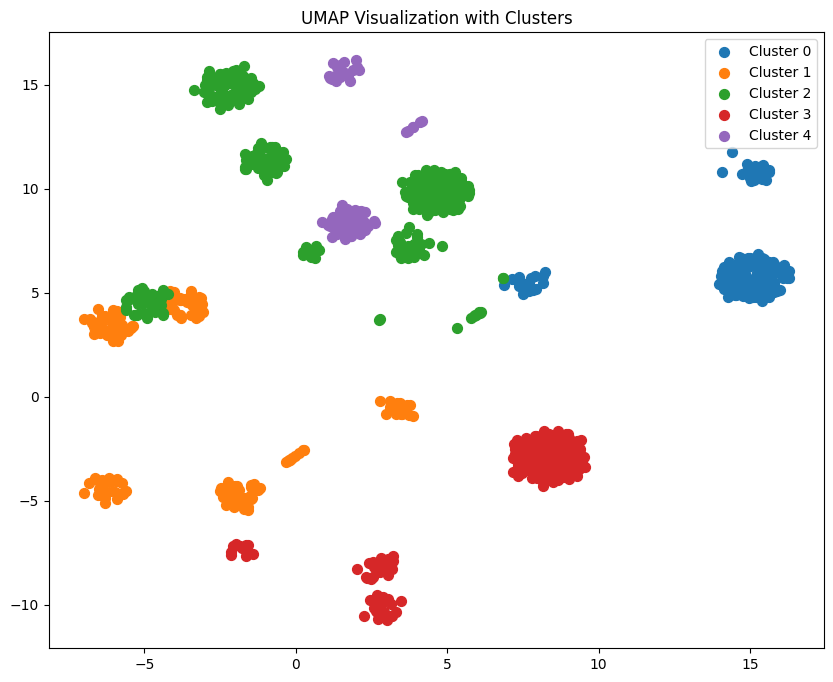

In [22]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the embeddings list to a numpy array
embeddings_np = np.array(embedding)

# Perform dimensionality reduction using UMAP
reducer = umap.UMAP(n_neighbors=2, min_dist=0.99, n_components=3)
embeddings_umap = reducer.fit_transform(embeddings_np)

# Perform clustering using K-means
n_clusters = 5  # You can choose the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap)

# Add the cluster labels to your dataframe
df['cluster'] = clusters

# Plotting with colored clusters
plt.figure(figsize=(10, 8))
for cluster_label in range(n_clusters):
    plt.scatter(
        embeddings_umap[clusters == cluster_label, 0],
        embeddings_umap[clusters == cluster_label, 1],
        s=50,
        label=f'Cluster {cluster_label}',
    )

plt.title('UMAP Visualization with Clusters')
plt.legend()
plt.show()

# Now df contains the cluster labels for each data point
#print(df.head())

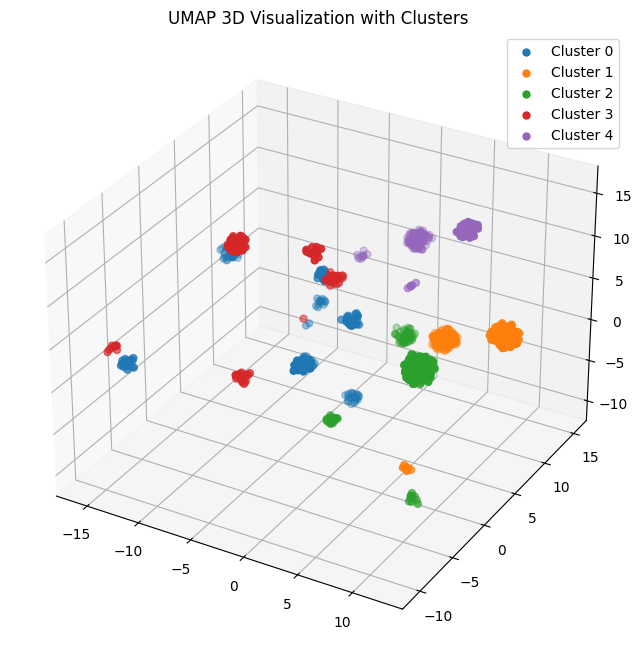

In [24]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting

# Convert the embeddings list to a numpy array
embeddings_np = np.array(embedding)

# Perform dimensionality reduction using UMAP with 3 components
reducer = umap.UMAP(n_neighbors=2, min_dist=0.99, n_components=3)
embeddings_umap_3d = reducer.fit_transform(embeddings_np)

# Perform clustering using K-means
n_clusters = 5  # You can choose the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap_3d)

# Add the cluster labels to your dataframe
df['cluster'] = clusters

# Plotting in 3D with colored clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(n_clusters):
    ax.scatter(
        embeddings_umap_3d[clusters == cluster_label, 0],
        embeddings_umap_3d[clusters == cluster_label, 1],
        embeddings_umap_3d[clusters == cluster_label, 2],
        s=25,
        label=f'Cluster {cluster_label}',
    )

ax.set_title('UMAP 3D Visualization with Clusters')
ax.legend()
plt.show()

# Now df contains the cluster labels for each data point
#print(df.head())

In [25]:
import umap
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd

# Convert the embeddings list to a numpy array
embeddings_np = np.array(embedding)

# Perform dimensionality reduction using UMAP with 3 components
reducer = umap.UMAP(n_neighbors=2, min_dist=0.99, n_components=3)
embeddings_umap_3d = reducer.fit_transform(embeddings_np)

# Perform clustering using K-means
n_clusters = 5  # You can choose the number of clusters based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap_3d)

# Create a DataFrame with the UMAP embeddings and cluster labels
df_umap = pd.DataFrame(embeddings_umap_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_umap['cluster'] = clusters

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_umap, x='UMAP1', y='UMAP2', z='UMAP3', color='cluster', size_max=10, opacity=0.7)
fig.update_layout(title='Interactive 3D Visualization with Clusters', scene=dict(aspectmode='cube'))
fig.show()

In [ ]:
# Let's say you want to see data points belonging to cluster 0
cluster_label_to_view0 = 0
cluster_data0 = df[df['cluster'] == cluster_label_to_view0]

# Let's say you want to see data points belonging to cluster 1
cluster_label_to_view1 = 1
cluster_data1 = df[df['cluster'] == cluster_label_to_view1]

# Let's say you want to see data points belonging to cluster 2
cluster_label_to_view2 = 2
cluster_data2 = df[df['cluster'] == cluster_label_to_view2]

# Let's say you want to see data points belonging to cluster 3
cluster_label_to_view3 = 3
cluster_data3 = df[df['cluster'] == cluster_label_to_view3]

# Let's say you want to see data points belonging to cluster 4
cluster_label_to_view4 = 4
cluster_data4 = df[df['cluster'] == cluster_label_to_view4]

In [ ]:
cluster_data0

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
0,वागर्थाविवसंपृक्तौवागर्थप्रतिपत्तये।जगतःपितरौव...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,मन्दःकवियशःप्रार्थीगमिष्याम्यपहास्यताम्।प्रांश...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,शैशवेऽभ्यस्तविद्यानांयौवनेविषयैषिणाम्।वार्धकेम...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,रघूणामन्वयंवक्ष्येतनुवाग्विभवोऽपिसन्।तद्गुणैःक...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10,वैवस्वतोमनुर्नाममाननीयोमनीषिणाम्।आसीन्महीक्षित...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,विक्रमव्यतिहारेणसामान्याऽभूद्द्वयोरपि।जयश्रीरन...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1021,राघवोरथमप्राप्ताम्तामाशाम्चसुरद्विषाम्।अर्धचन्...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1026,मरुताम्पश्यताम्तस्यशिरांसिपतितान्यपि।मनोनातिवि...,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1029,रघुपतिरपिजातवेदोविशुद्धाम्प्रगृह्यप्रियाम्प्रि...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
cluster_data1

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
4,सोऽहमाजन्मशुद्धानामाफलोदयकर्मणाम्।आसमुद्रक्षित...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13,सर्वातिरिक्तसारेणसर्वतेजोभिभाविना।स्थितःसर्वोन...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
18,सेनापरिच्छदस्तस्यद्वयमेवार्थसाधनम्।शास्त्रेष्व...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
24,स्थित्यैदण्डयतोदण्ड्यान्परिणेतुःप्रसूतये।अप्यर...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29,सवेलावप्रवलयांपरिखीकृतसागराम्।अनन्यशासनामुर्वी...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,सप्रापहृदयन्यस्तमणिस्पर्शनिमीलितः।अपयोधरसंसर्ग...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
992,सप्रतस्थेऽरिनाशायहरिसैन्यैरनुद्रुतः।नकेवलम्भुव...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
995,ससेतुम्बन्धयामासप्लवगैर्लवणाम्भसि।रसातलादिवोन्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1003,समारुतिसमानीतमहौषधिहतव्यथः।लङ्कास्त्रीणाम्पुनश...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
cluster_data2

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
1,क्वसूर्यप्रभवोवंशःक्वचाल्पविषयामतिः।तितीर्षुर्...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
17,प्रजानामेवभूत्यर्थंसताभ्योबलिमग्रहीत्।सहस्रगुण...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
23,प्रजानांविनयाधानाद्रक्षणाद्भरणादपि।सपितापितरस्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
31,कलत्रवन्तमात्मानमवरोधेमहत्यपि।तयामेनेमनस्विन्य...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
39,परस्पराक्षिसादृश्यमदूरोज्झितवर्त्मसु।मृगद्वन्द...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,प्रत्यभिज्ञानरत्नम्चरामायादर्शयत्कृती।हृदयम्स्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
998,पादपाविद्धपरिघःशिलानिष्पिष्टमुद्गरः।अतिशस्त्रन...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1000,कामम्जीवतिमेनाथइतिसाविजहौशुचम्।प्राङ्मत्वासत्य...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1005,कुम्भकर्णःकपीन्द्रेणतुल्यावस्थःस्वसुःकृतः।रुरो...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2


In [ ]:
cluster_data3

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
6,त्यागायसंभृतार्थानांसत्यायमितभाषिणाम्।यशसेविजि...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
9,तंसन्तःश्रोतुमर्हन्तिसदसद्व्यक्तिहेतवः। हेम्नः...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
11,तदन्वयेशुद्धिमतिप्रसूतःशुद्धिमत्तरः।दिलीपइतिरा...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
19,तस्यसंवृतमन्त्रस्यगूढाकारेङ्गितस्यच।फलानुमेयाः...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
25,दुदोहगांसयज्ञायसस्यायमघवादिवम्।सम्पद्विनियमेनो...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,ततोबिभेदपौलस्त्यःशक्त्यावक्षसिलक्ष्मणम्।रामस्त...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1010,तमाधूतध्वजपटम्व्योमगङ्गोर्मिवायुभिः।देवसूतभुजा...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,3
1015,तस्यस्फुरतिपौलस्त्यःसीतासंगमशंसिनि।निचखानाधिकक...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1023,तद्व्योम्निशतधाभिन्नम्ददृशेदीप्तिमन्मुखम्।वपुर...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
cluster_data4

,Text,"nirveda - weeping, sighing,indifference,dicouragement",glani - guilty,sanka - doubt (apprehension),asuya/irsya - jealousy (envy),mada - madness (intoxication),srama - fatigue,"alasya/alasata - laziness,sitting idle (unwililng to work)","dainya - meekness (depression),(despair)",cinta - contemplation (anxiety/reflection),...,utsaha - hyped/enthused,"shraddhaadaya - confidence,trust",krodha - anger,"karuna - pity,kind","veera - royality,valour,greatness","shanta - serene,peaceful,pleasant",vismaya - exaggeration/wonder/surprise/pride/doubt,bhakti - devotion,no emotion,cluster
3,अथवाकृतवाग्द्वारेवंशेऽस्मिन्पूर्वसूरिभिः।मणौवज...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,यथाविधिहुताग्नीनांयथाकामार्चितार्थिनाम्।यथापरा...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,4
14,आकारसदृशप्रज्ञःप्रज्ञयासदृशागमः।आगमैःसदृशारम्भ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
20,जुगोपात्मानमत्रस्तःभेजेधर्ममनातुरः।अगृध्नुरादद...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
21,ज्ञानेमौनंक्षमाशक्तौत्यागेश्लाघाविपर्ययः।गुणाग...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,अयःशङ्कुचिताम्रक्षःशतघ्नीमथशत्रवे।हृताम्वैवस्व...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1022,अमोघम्संदधेचास्मैधनुष्येकधनुर्धरः।ब्राह्ममस्त्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1025,बालार्कप्रतिमेवाप्सुवीचिभिन्नापतिष्यतः।रराजरक्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
1027,अथमदगुरुपक्षैलोकपालद्विपानामनुगतमलिवृन्दैर्गण्...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
import numpy as np
import pandas as pd

# Assuming you have a DataFrame named cluster_data0

# Columns to exclude
exclude_cols = ['Text', 'cluster']

# Exclude columns temporarily (avoid modifying original DataFrame)
filtered_df = cluster_data4.drop(exclude_cols, axis=1)

# Count the number of 1s in each column (vectorized)
ones_count = filtered_df.values.sum(axis=0)

# Find the indices of the top 3 columns with the most 1s
top_3_indices = np.argsort(ones_count)[-5:][::-1]

# Access the column names using the indices
top_3_columns = filtered_df.columns[top_3_indices]

# Print the top 3 columns with the most 1s
print("Top 3 columns with the most 1s:")
for col in top_3_columns:
    print(col)

Top 3 columns with the most 1s:
veera - royality,valour,greatness
vismaya - exaggeration/wonder/surprise/pride/doubt
no emotion
harsa - jubiliation,enjoyment (joy)
avega - intense emotion (agitation/flurry)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Create a t-SNE object
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)

# Apply t-SNE to the scaled data
tsne_result = tsne.fit_transform(data)

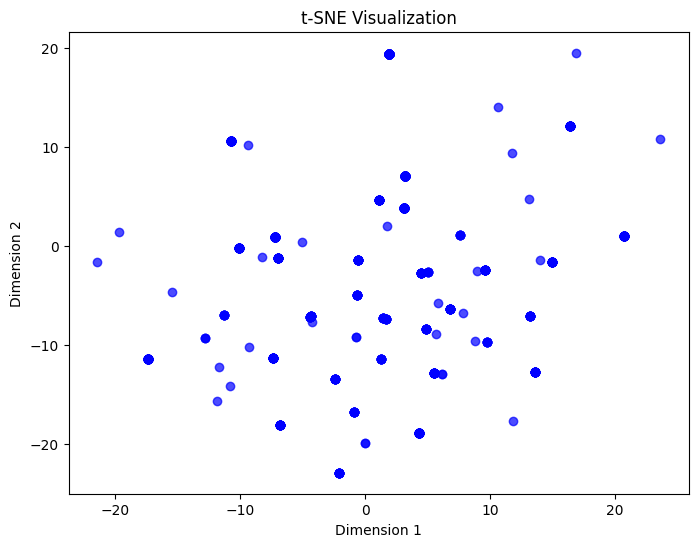

In [ ]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', c='b', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()